In [ ]:
import pandas as pd

# Load the uploaded file to inspect its structure
file_path = '/content/SMU36935616562440001.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,DATE,SMU36935616562440001
0,1990-01-01,14.1
1,1990-02-01,14.1
2,1990-03-01,14.2
3,1990-04-01,14.0
4,1990-05-01,14.0


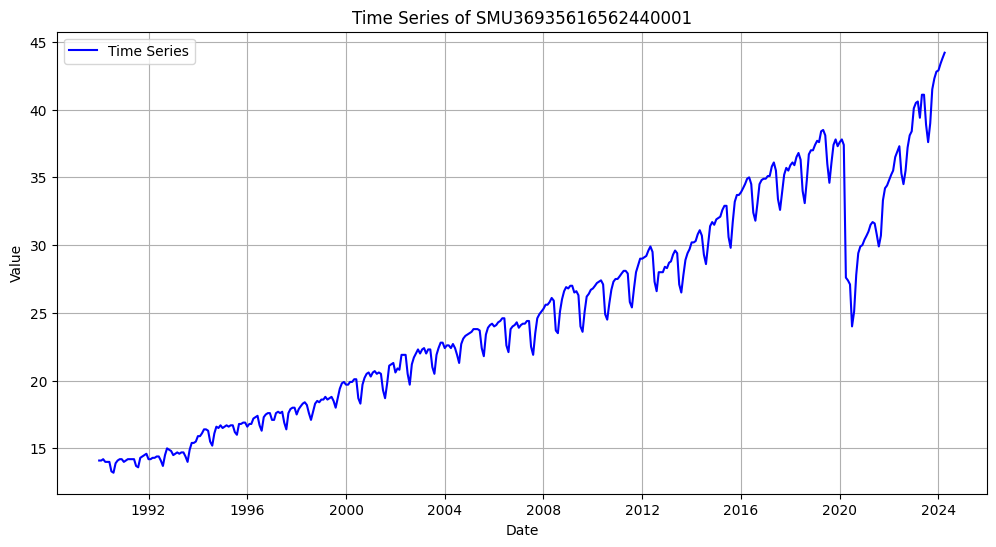

In [ ]:
import matplotlib.pyplot as plt

# Convert DATE to datetime and set it as the index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SMU36935616562440001'], label='Time Series', color='blue')
plt.title('Time Series of SMU36935616562440001')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

The time series plot reveals the following:

Overall Trend: There seems to be a general pattern with fluctuations, but any long-term upward or downward trend isn't immediately clear.

Seasonality: There might be a periodic pattern, suggesting seasonality. A closer analysis will confirm this.

COVID Effects: Around early 2020 (the onset of the COVID pandemic), there could be noticeable disruptions in the pattern. I'll analyze this further as we proceed

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(data['SMU36935616562440001'])

# Extract test results
adf_results = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_results

{'Test Statistic': 0.307253200581767,
 'p-value': 0.9776748225226093,
 'Lags Used': 18,
 'Number of Observations Used': 393,
 'Critical Values': {'1%': -3.447099431978147,
  '5%': -2.8689225261604263,
  '10%': -2.57070269105012}}

The Augmented Dickey-Fuller test results are as follows:

Test Statistic: 0.307

p-value: 0.978

Critical Values: At the 1%, 5%, and 10% levels, the
critical values are -3.447, -2.869, and -2.571, respectively.

Interpretation:

1). Since the test statistic (0.307) is greater than all
critical values, and the p-value (0.978) is significantly higher than 0.05, we fail to reject the null hypothesis.

2). This indicates that the time series is not stationary.

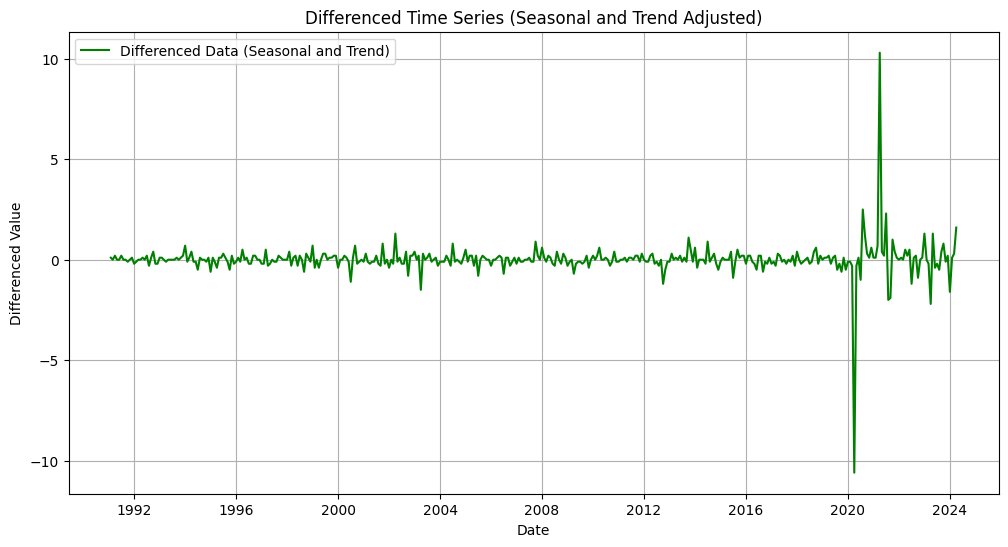

{'Test Statistic': -9.162244318246811,
 'p-value': 2.5147966936676514e-15,
 'Lags Used': 11,
 'Number of Observations Used': 387,
 'Critical Values': {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636}}

In [ ]:
# First differencing to remove seasonality (difference of 12)
data_diff_seasonal = data['SMU36935616562440001'].diff(12).dropna()

# Second differencing to remove trend (difference of 1)
data_diff_trend = data_diff_seasonal.diff(1).dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff_trend, label='Differenced Data (Seasonal and Trend)', color='green')
plt.title('Differenced Time Series (Seasonal and Trend Adjusted)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.legend()
plt.show()

# Perform ADF test on the doubly differenced data
adf_test_diff = adfuller(data_diff_trend)

# Extract test results for the differenced data
adf_diff_results = {
    'Test Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Lags Used': adf_test_diff[2],
    'Number of Observations Used': adf_test_diff[3],
    'Critical Values': adf_test_diff[4],
}

adf_diff_results

Augmented Dickey-Fuller Test Results on Differenced Data:

Test Statistic: -9.162

p-value: 2.51e-15 (very close to zero)

Critical Values: -3.447 (1%), -2.869 (5%), -2.571 (10%)
Interpretation:

1). The test statistic (-9.162) is much smaller than the critical values, and the p-value is far below 0.05.

2). This confirms that the doubly differenced time series is stationary.

<Figure size 1200x600 with 0 Axes>

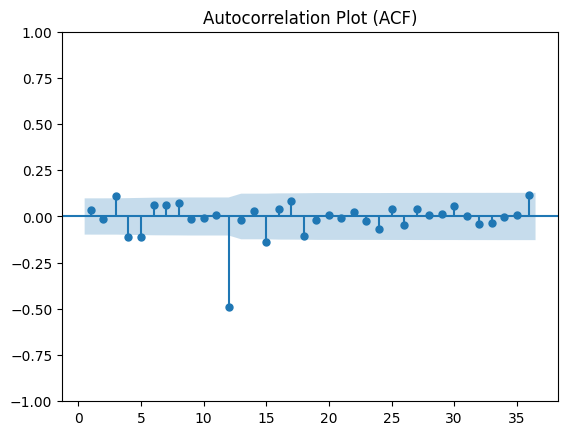

<Figure size 1200x600 with 0 Axes>

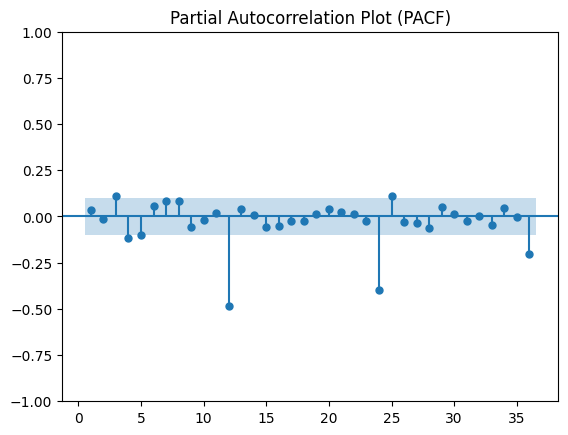

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation (ACF) for 36 lags (3 years)
plt.figure(figsize=(12, 6))
plot_acf(data_diff_trend, lags=36, title='Autocorrelation Plot (ACF)', zero=False)
plt.show()

# Plot partial autocorrelation (PACF) for 36 lags (3 years)
plt.figure(figsize=(12, 6))
plot_pacf(data_diff_trend, lags=36, title='Partial Autocorrelation Plot (PACF)', zero=False)
plt.show()

**Observations from the ACF and PACF Plots:**

Autocorrelation (ACF):

There are significant correlations at a few lags, possibly indicating some residual seasonality or remaining structure.

Most correlations decline rapidly, suggesting that the differencing effectively removed much of the autocorrelation.

**Partial Autocorrelation (PACF):**

Significant partial autocorrelations appear at specific lags, particularly the earlier lags, suggesting potential influences at short time intervals.

**Interpretation:**

The significant correlations in ACF and PACF suggest that some lagged effects remain, which could guide model selection in future analysis (e.g., ARIMA)

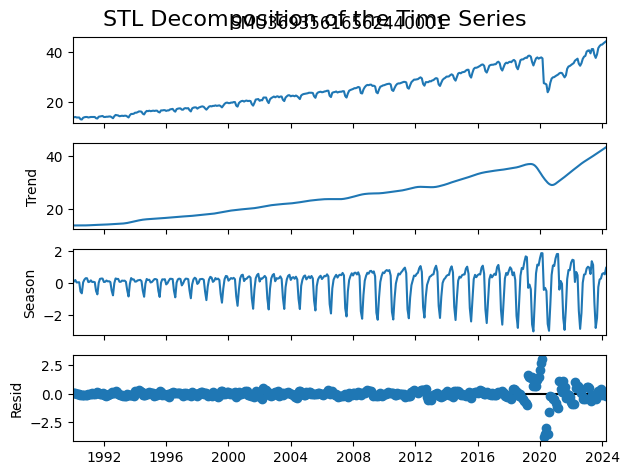

In [ ]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition with a seasonal period of 12
stl = STL(data['SMU36935616562440001'], period=12)
stl_result = stl.fit()

# Plot the STL decomposition results
stl_result.plot()
plt.suptitle('STL Decomposition of the Time Series', fontsize=16)
plt.show()

**Observations from the STL Decomposition:**

Trend Component: The trend appears smooth and highlights long-term changes in the data. Any disruptions, such as those caused by COVID, can be observed here.

Seasonal Component: The seasonal pattern is clear and consistent, suggesting strong periodicity with a 12-month cycle.

Residual Component: The residuals seem to fluctuate randomly around zero, with some notable deviations that could align with external events like the COVID pandemic.

**Consistency with Initial Impressions:**

The decomposition confirms the presence of seasonality observed in the original plot.

The residuals highlight irregularities, such as potential effects during 2020, aligning with the suspected COVID impact.